In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, 
                      housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()
# there has a NAN value in  total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


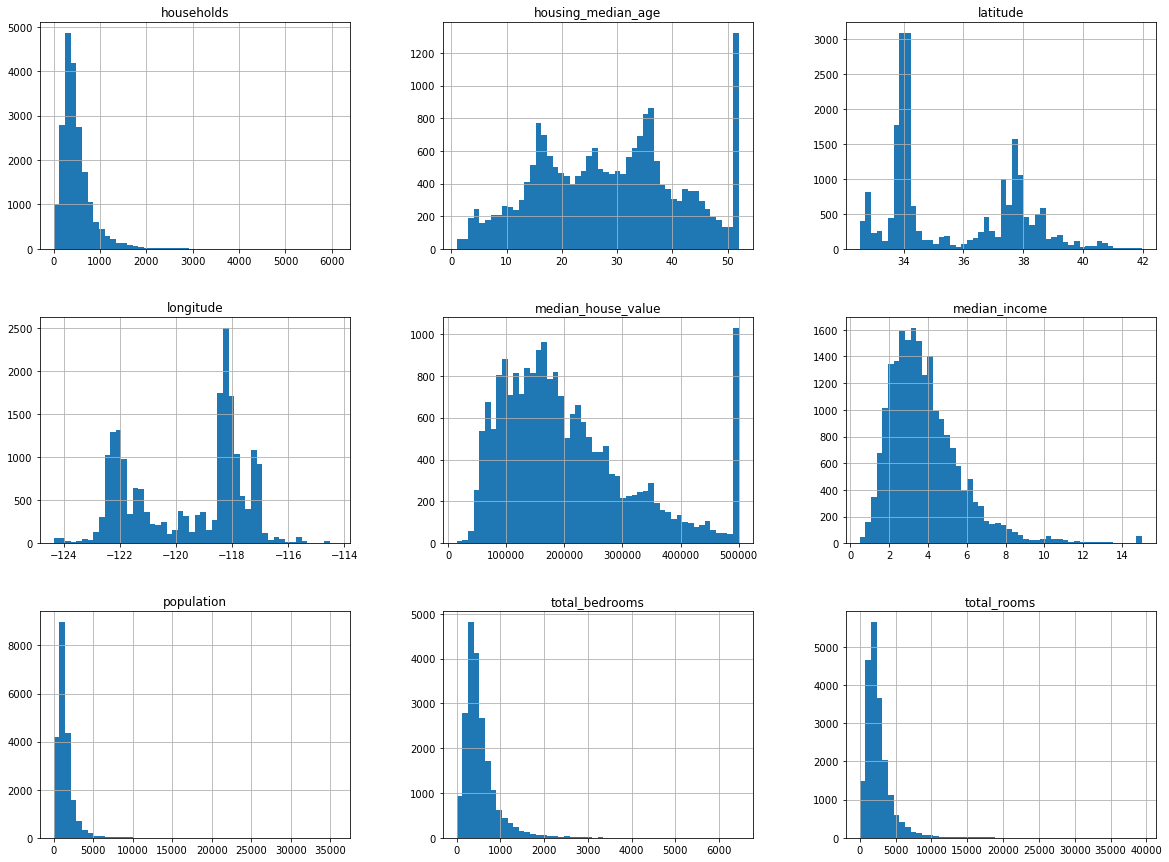

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# to make this notebook's output identical at every run
import numpy as np
np.random.seed(42)

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [9]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set),'Train + ',len(test_set),' Test')

16512 Train +  4128  Test


In [10]:
# there is a anotherway to use the API in the sklearn
from sklearn.model_selection import train_test_split
train_set1, test_set1 = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
test_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


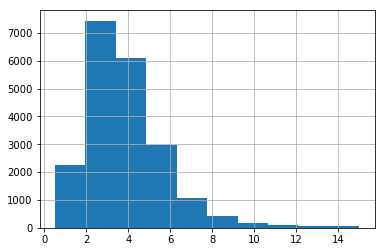

In [12]:
housing['median_income'].hist()

In [13]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [15]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.087633
2.0    0.079700
4.0    0.044089
5.0    0.028646
1.0    0.009932
Name: income_cat, dtype: float64

In [17]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({'Overall':income_cat_proportions(housing),
                             'Stratified':income_cat_proportions(strat_test_set),
                             'Random':income_cat_proportions(test_set),}).sort_index()

In [18]:
compare_props

,Overall,Random,Stratified
1.0,0.039826,0.040213,0.039729
2.0,0.318847,0.324370,0.318798
3.0,0.350581,0.358527,0.350533
4.0,0.176308,0.167393,0.176357
5.0,0.114438,0.109496,0.114583


In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

Discove and visualize the data to gain insights

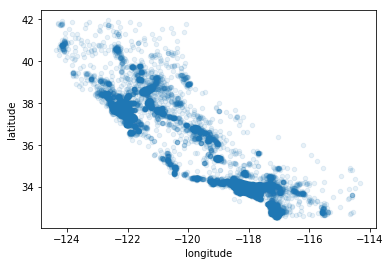

In [20]:
housing1 = strat_train_set.copy()
housing1.plot(kind='scatter', x='longitude',y='latitude',alpha=0.1)
plt.show()

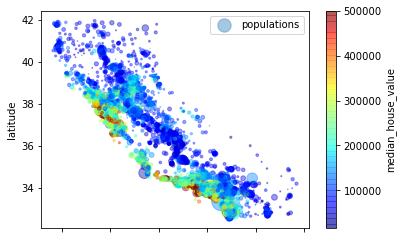

In [21]:
housing1.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing1['population']/100,label='populations',
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True),
plt.legend()

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a0d320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112553470>]], dtype=object)

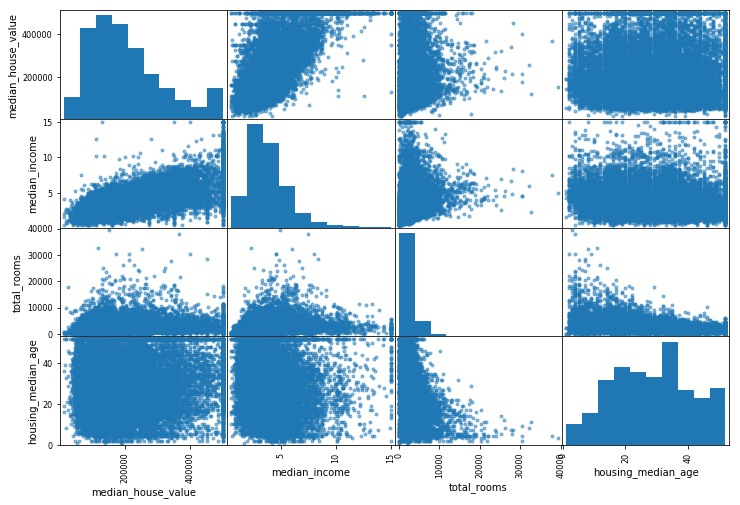

In [24]:
from pandas.tools.plotting import scatter_matrix
# easy to get the tools from sklearn
attribute = ['median_house_value', 'median_income','total_rooms',
            'housing_median_age']
scatter_matrix(housing[attribute],figsize=(12,8))

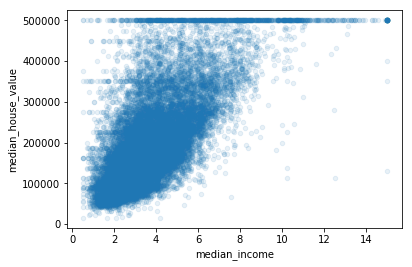

In [25]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',
            alpha=0.1)

In [26]:
# Experimenting with Attribute Combination
housing['room_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
room_per_household          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [28]:
# Preapre data for machine learning
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
# Data Cleaning
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [31]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [32]:
X = imputer.transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [34]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [35]:
# Handing Text and Categorical Attribute
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encode = encoder.fit_transform(housing_cat)
housing_cat_encode

array([0, 0, 4, ..., 1, 0, 3])

In [36]:
encoder.classes_


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encode.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
# we can also simply combine these two transform in the classes in sklearn


In [39]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.base import BaseEstimator,TransformerMixin
room_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,room_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
    
        
        
        
        

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                        ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler()),
                        ])


In [42]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

In [43]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values
    

In [44]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [45]:
housing_num_tr = pd.DataFrame(housing_num_tr)

In [46]:
housing_num_tr.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928


In [47]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])





In [48]:
housing_prepared = full_pipeline.fit_transform(housing)

In [49]:
housing_prepared.shape

(16512, 16)

In [50]:
columns = num_attribs + ['room_per_household','population_per_household',
                        'bedrooms_per_house'] + cat_attribs

In [51]:
columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'room_per_household',
 'population_per_household',
 'bedrooms_per_house',
 'ocean_proximity']

In [52]:
housing_prepared = pd.DataFrame(housing_prepared)

In [53]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 16 columns):
0     16512 non-null float64
1     16512 non-null float64
2     16512 non-null float64
3     16512 non-null float64
4     16512 non-null float64
5     16512 non-null float64
6     16512 non-null float64
7     16512 non-null float64
8     16512 non-null float64
9     16512 non-null float64
10    16512 non-null float64
11    16512 non-null float64
12    16512 non-null float64
13    16512 non-null float64
14    16512 non-null float64
15    16512 non-null float64
dtypes: float64(16)
memory usage: 2.0 MB


# Select and Train Model
# Training and Evaluating on the Training Set

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Prediction:\t',lin_reg.predict(some_data_prepared))
print('labels:\t\t',list(some_labels))


Prediction:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [56]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)

lin_rmse



68628.198198489234

### Let's try with the DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)


### Better Evaluation Using Cross-Validation

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores


array([ 69316.02634772,  65498.84994772,  71404.25935862,  69098.46240168,
        70580.30735263,  75540.88413124,  69717.93143674,  70428.42648461,
        75888.17618283,  68976.12268448])

In [59]:
# let's look at the result
def display_scores(scores):
    print('Scores: ',scores)
    print('Mean',scores.mean())
    print('Standard deviation: ',scores.std())
    

In [60]:
display_scores(rmse_scores)

Scores:  [ 69316.02634772  65498.84994772  71404.25935862  69098.46240168
  70580.30735263  75540.88413124  69717.93143674  70428.42648461
  75888.17618283  68976.12268448]
Mean 70644.9446328
Standard deviation:  2938.93789263


In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error',cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)
# the decision tree is overfitting so badly that it performs wrose
#than the linear Regression model

Scores:  [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean 69052.4613635
Standard deviation:  2731.6740018


In [62]:
# let's try the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg,housing_prepared,
                               housing_labels,scoring='neg_mean_squared_error',
                               cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores:  [ 52869.23106834  49189.93801195  51726.73647871  54995.98190463
  50979.93079904  55978.43765914  52283.7609046   51001.92227546
  54447.35786983  53389.94422283]
Mean 52686.3241195
Standard deviation:  1971.26547795


In [63]:
import pickle
forest_rmse_score

array([ 52869.23106834,  49189.93801195,  51726.73647871,  54995.98190463,
        50979.93079904,  55978.43765914,  52283.7609046 ,  51001.92227546,
        54447.35786983,  53389.94422283])

In [64]:
pickle.dump(forest_rmse_score,open('/Users/pein/Desktop/text.txt','wb'))

In [65]:
pickle.load(open('/Users/pein/Desktop/text.txt','rb'))

array([ 52869.23106834,  49189.93801195,  51726.73647871,  54995.98190463,
        50979.93079904,  55978.43765914,  52283.7609046 ,  51001.92227546,
        54447.35786983,  53389.94422283])

In [66]:
import numpy as np
testMat = np.array([[1,1,0],[1,1,0],[1,0,1]])
testMat = np.mat(testMat)
testMat

matrix([[1, 1, 0],
        [1, 1, 0],
        [1, 0, 1]])

In [67]:
testMat[np.nonzero(testMat[:,1])[0],:]

matrix([[1, 1, 0],
        [1, 1, 0]])

### Fine-Tune Your Model

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid =[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)




GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [69]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Randomized Search

In [72]:
np.random.normal(30,10,(10,1))

array([[ 35.55547973],
       [ 21.0429994 ],
       [ 37.57092184],
       [ 12.76085952],
       [ 21.51803129],
       [ 42.66584283],
       [ 37.08594438],
       [ 32.91508088],
       [ 39.43713877],
       [ 40.13192674]])

In [73]:
a = pd.DataFrame(np.random.rand(2,3))
b = pd.DataFrame(np.random.randn(2,4))

In [74]:
a

,0,1,2
0,0.381971,0.911429,0.277323
1,0.205280,0.364224,0.650156


In [75]:
b

,0,1,2,3
0,0.490823,0.492359,1.468057,0.489559
1,-0.423224,-0.407476,-0.005781,1.132669


In [78]:
pd.concat([a,b],axis=1)

,0,1,2,0,1,2,3
0,0.381971,0.911429,0.277323,0.490823,0.492359,1.468057,0.489559
1,0.205280,0.364224,0.650156,-0.423224,-0.407476,-0.005781,1.132669
